
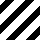
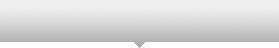
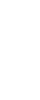
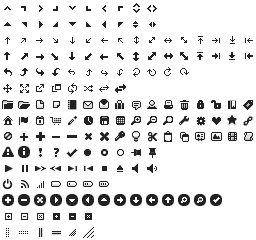
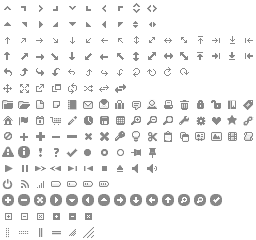
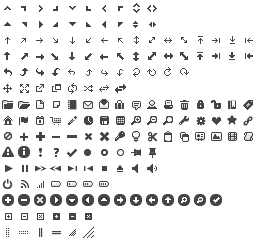
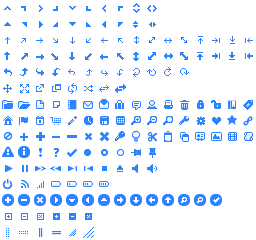
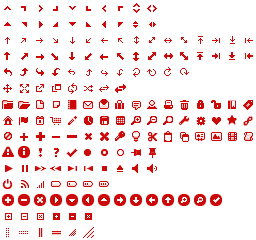
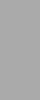
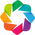
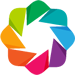
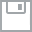
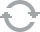
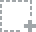
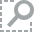
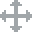
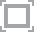
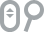

In [28]:
import demo_funcs
import bokeh.plotting as bk
from bokeh.sampledata import us_counties
bk.output_notebook(force=True)

In [29]:
users = demo_funcs.create_users(10)

In [30]:
route_shapes = []
for user in users:
    route = demo_funcs.create_route(user)
    route_shapes.append(demo_funcs.get_line_shape(route))

In [31]:
county_xs=[
   us_counties.data[code]['lons'] for code in us_counties.data
   if us_counties.data[code]['state'] == 'nc'
]
county_ys=[
   us_counties.data[code]['lats'] for code in us_counties.data
   if us_counties.data[code]['state'] == 'nc'
]

In [32]:
color_list = demo_funcs.color_mapper(len(users))

In [46]:
bk.figure(plot_width=850, plot_height=500, title="Users Homes and Destinations", tools="pan, box_zoom, reset")
bk.hold(True)
bk1 = bk.patches(county_xs, county_ys, fill_color="#A49480", line_color="white", line_width=0.5)

In [47]:
for index, user in enumerate(users):
    latitudes = [user["home_latitude"], user["work_latitude"]]
    longitudes = [user["home_longitude"], user["work_longitude"]]
    bk.scatter(longitudes, latitudes, color=color_list(index))

In [48]:
bk.hold(False)
bk.show()

In [71]:
bk.figure(plot_width=850, plot_height=500, title="Individuals Routes", tools="pan, box_zoom, reset")
bk.hold(True)
bk1 = bk.patches(county_xs, county_ys, fill_color="#A49480", line_color="white", line_width=0.5)

In [72]:
for index, shape_list in enumerate(route_shapes):
    latitudes, longitudes = demo_funcs.parse_request(shape_list)
    bk.line(longitudes, latitudes, line_width=2, color=color_list(index))
for index, user in enumerate(users):
    latitudes = [user["home_latitude"], user["work_latitude"]]
    longitudes = [user["home_longitude"], user["work_longitude"]]
    bk.scatter(longitudes, latitudes, color=color_list(index))

In [73]:
bk.hold(False)
bk.show()

In [52]:
carpools = demo_funcs.pair_users(users)

In [61]:
bk.figure(plot_width=850, plot_height=500, title="Calculated Pairs", tools="pan, box_zoom, reset")
bk.hold(True)
bk1 = bk.patches(county_xs, county_ys, fill_color="#A49480", line_color="white", line_width=0.5)

In [62]:
for index, carpool in enumerate(carpools):
    home_latitudes = [carpool[0]["home_latitude"], carpool[1]["home_latitude"]]
    home_longitudes = [carpool[0]["home_longitude"], carpool[1]["home_longitude"]]
    work_latitudes = [carpool[0]["work_latitude"], carpool[1]["work_latitude"]]
    work_longitudes = [carpool[0]["work_longitude"], carpool[1]["work_longitude"]]
    bk.line(home_longitudes, home_latitudes, line_width=2, color=color_list(index))
    bk.line(work_longitudes, work_latitudes, line_width=2, color=color_list(index))

In [63]:
bk.hold(False)
bk.show()

In [64]:
route_shapes = []
for carpool in carpools:
    route_shapes.append(demo_funcs.determine_best_route(carpool))

In [68]:
bk.figure(plot_width=850, plot_height=500, title="Carpools!!!", tools="pan, box_zoom, reset")
bk.hold(True)
bk1 = bk.patches(county_xs, county_ys, fill_color="#A49480", line_color="white", line_width=0.5)

In [69]:
for index, shape_list in enumerate(route_shapes):
    latitudes, longitudes = demo_funcs.parse_request(shape_list)
    bk.line(longitudes, latitudes, line_width=2, color=color_list(index))
for index, user in enumerate(users):
    latitudes = [user["home_latitude"], user["work_latitude"]]
    longitudes = [user["home_longitude"], user["work_longitude"]]
    bk.scatter(longitudes, latitudes, color=color_list(index))

In [70]:
bk.hold(False)
bk.show()